In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas
import millefeuille as mf

In [23]:
points = mf.PointData()
points['x'] = np.random.rand(400) * 20 - 10
points['y'] = np.random.rand(400) * 20 - 10
points['a'] = points['x']**2 + points['y']**2
points['b'] = points['x']**3 + points['y']**3

In [24]:
grid = mf.Grid()
grid['x'].edges = np.linspace(-10,10,1000)
grid['y'].edges = np.linspace(-10,10,1000)
griddata = mf.GridData(grid)

In [25]:
bins = mf.Grid()
bins['x'].edges = np.linspace(-10, 10, 21)
bins['y'].edges = np.linspace(-10, 10, 21)
hists = mf.GridData(bins)

In [26]:
hist_x = mf.GridData(mf.Grid(bins['x']))

In [27]:
griddata['a'] = points.interpolate('a', method='nearest')
griddata['a'] = np.nan_to_num(griddata['a'])

hists['a'] = points.histogram('a', function=np.average)
hists['b'] = points.interpolate('a', method='cubic')
hists['b'] = np.nan_to_num(hists['b'])
hists['a'] = np.nan_to_num(hists['a'])

hist_x['a'] = points.histogram('a', method='sum')
hist_x['a_error'] = np.sqrt(hist_x['a'])

points['bla'] = hists.lookup('a')

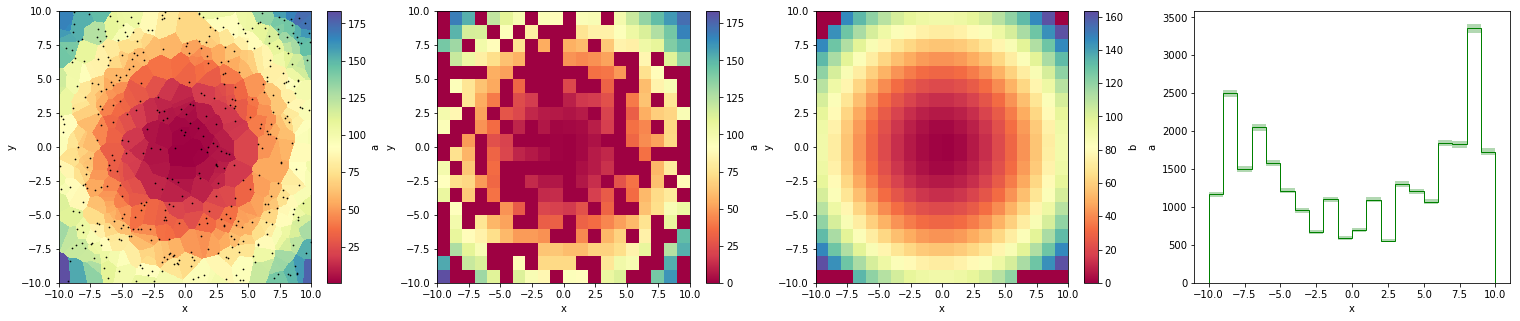

In [28]:
%matplotlib inline
from matplotlib import pyplot as plt

fig, (ax1, ax2, ax3, ax4) = plt.subplots(figsize=(26,5), ncols=4)

griddata.plot_map(fig, ax1, 'a', cmap='Spectral', cbar=True)
points.plot_2d(fig, ax1, 'x', 'y', color='k', s=2, marker='.')

hists.plot_map(fig, ax2, 'a', cmap='Spectral', cbar=True)
hists.plot_map(fig, ax3, 'b', cmap='Spectral', cbar=True)

hist_x.plot_step(fig, ax4, 'a', histtype='step', color='g')
hist_x.plot_errorband(fig, ax4, 'a', 'a_error', color='g', alpha=0.3)

In [29]:
np.average(np.abs(points['bla'] - points['a']))

1.910744804891368